## Swarm Behaviour Data
Projeto Final da disciplina de Soluções em Mineração de Dados

Aluno: Andrey Moutelik (arma2)

### Imports de bibliotecas e datasets

Importando o dataset e as bibliotecas necessárias

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00524/Swarm%20Behavior%20Data.zip

--2023-04-12 22:42:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/00524/Swarm%20Behavior%20Data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222915673 (213M) [application/x-httpd-php]
Saving to: ‘Swarm Behavior Data.zip’

Swarm Behavior Data 100%[===================>] 212.59M  18.8MB/s    in 12s     

2023-04-12 22:43:04 (17.2 MB/s) - ‘Swarm Behavior Data.zip’ saved [222915673/222915673]



In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from zipfile import ZipFile
file_name = "Swarm Behavior Data.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


Descrição das features:

xm e ym são a posição (X,Y) de cada boid;

xVeln e yVeln são o vetor de velocidade;

xAm e yAm são o vetor de alinhamento;

xSm e ySm são o vetor de separação;

xCm e yCm são o vetor de coesão;

nACm é o número de boids em um raio de Alinhamento/Coesão;

nSm é o número de boids no raio de Separação.

Esses atributos são repetidos para todos os m boids, onde m = 1,...,200. (12*200 = 2 400)

Resultando em *2400 FEATURES*


In [4]:
df_Aligned = pd.read_csv("/content/Swarm Behavior Data/Aligned.csv", low_memory= False)
df_Flocking = pd.read_csv("/content/Swarm Behavior Data/Flocking.csv", low_memory= False)
df_Grouped = pd.read_csv("/content/Swarm Behavior Data/Grouped.csv", low_memory= False)

In [5]:
# tem um bug no dataset na coluna class de 'Flocking', aqui corrijo isso
df_Flocking['Class'] = df_Flocking['Class ']
df_Flocking = df_Flocking.drop(['Class '], axis=1)
df_Flocking.x1[24015] = 0

<ipython-input-5-489a0ac30fd3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Flocking.x1[24015] = 0


In [6]:
df_Flocking.describe()

,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,nAC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Class
count,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,...,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.000000,24016.00000,24016.00000
mean,-73.077114,-0.737331,0.041984,-0.148090,0.151028,-1.217209,-0.835799,-0.035581,0.075808,19.029772,...,0.065710,-0.125927,0.127226,-1.660584,-0.095942,-0.017049,0.085548,26.258744,2.14736,0.50000
std,572.552115,6.445250,7.374884,0.377028,0.590219,27.762943,21.669753,0.558147,0.626971,23.233237,...,7.709457,0.380757,0.571121,77.201164,7.362780,0.551924,0.613370,33.997001,7.53273,0.50001
min,-1012.180000,-18.590000,-18.410000,-1.000000,-1.000000,-944.070000,-847.910000,-2.680000,-2.680000,0.000000,...,-18.440000,-1.040000,-1.000000,-4079.230000,-370.240000,-2.680000,-2.680000,0.000000,0.00000,0.00000
25%,-609.352500,-5.520000,-5.710000,-0.230000,-0.010000,0.000000,0.000000,-0.040000,-0.020000,3.000000,...,-5.620000,-0.190000,0.000000,0.000000,0.000000,-0.072500,0.000000,2.000000,0.00000,0.00000
50%,-156.685000,-0.460000,-1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,...,-0.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.00000,0.50000
75%,424.445000,3.820000,7.310000,0.000000,0.940000,0.000000,0.000000,0.000000,0.020000,31.000000,...,7.480000,0.000000,0.540000,0.000000,0.000000,0.000000,0.020000,35.000000,1.00000,1.00000
max,1015.800000,18.470000,18.630000,1.000000,1.040000,68.560000,234.740000,2.680000,2.680000,157.000000,...,18.530000,1.000000,1.040000,255.990000,68.940000,2.680000,2.680000,142.000000,65.00000,1.00000


### Checagem de valores faltantes, valores duplicados, e paridade entre os datasets

Checar valores faltantes nos datasets

In [7]:
missing_aligned_values = df_Aligned.isna().sum()
print("Valores Faltando do dataset Aligned")
print(missing_aligned_values)

missing_flocking_values = df_Flocking.isna().sum()
print("Valores Faltando do dataset Flocking")
print(missing_flocking_values)

missing_grouped_values = df_Grouped.isna().sum()
print("Valores Faltando do dataset Grouped")
print(missing_grouped_values)

Valores Faltando do dataset Aligned
x1        0
y1        0
xVel1     0
yVel1     0
xA1       0
         ..
xC200     0
yC200     0
nAC200    0
nS200     0
Class     0
Length: 2401, dtype: int64
Valores Faltando do dataset Flocking
x1        0
y1        0
xVel1     0
yVel1     0
xA1       0
         ..
xC200     0
yC200     0
nAC200    0
nS200     0
Class     0
Length: 2401, dtype: int64
Valores Faltando do dataset Grouped
x1        0
y1        0
xVel1     0
yVel1     0
xA1       0
         ..
xC200     0
yC200     0
nAC200    0
nS200     0
Class     0
Length: 2401, dtype: int64


Devido a estrutura dos datasets eu assumo que, com exceção da última coluna os três são identicos

Aqui eu faço a checagem dessa hipótese

In [8]:
dfA_drop = df_Aligned.iloc[:, :-1]
dfF_drop = df_Flocking.iloc[:, :-1]
dfG_drop = df_Grouped.iloc[:, :-1]
are_equal = dfA_drop.equals(dfF_drop)

# Print the result.
print(f'Os DataFrames Aligned e Flocking são iguais? {are_equal}')

are_equal = dfA_drop.equals(dfG_drop)
print(f'Os DataFrames Aligned e Grouped são iguais? {are_equal}')

Os DataFrames Aligned e Flocking são iguais? False
Os DataFrames Aligned e Grouped são iguais? True


A suposição estava parcialmente correta, os valores dos datasets Aligned e Grouped são iguais, porém os de Flocking são diferentes 

In [9]:
diff = dfA_drop.compare(dfF_drop)
num_diff = len(diff)
print(f'Os DataFrames Aligned e Flocking tem {num_diff} valores diferentes.')

Os DataFrames Aligned e Flocking tem 24016 valores diferentes.


Curiosamente, os datasets tem 24016 valores diferentes, o que corresponde exatamente ao número de linhas neles contidos

Vai que apenas uma linha é diferente entre os dois datasets?

Testo em seguida essa possibilidade:

In [10]:
diff_count = (dfA_drop.ne(dfF_drop)).sum(axis=1)

# Print the count of differences per row.
print('Count of differences per row:')
print(diff_count)

Count of differences per row:
0           1
1           1
2           1
3           1
4           1
         ... 
24011    1780
24012    1385
24013    1027
24014    1635
24015    2044
Length: 24016, dtype: int64


Não é o caso.

Porém uma coisa é interessante, começamos com vários 'uns' e embaixo temos valores bastante altos. E se a maioria das linhas do dataset contém apenas um atributo diferente na comparação?

In [11]:
diff_count = (dfA_drop.ne(dfF_drop)).sum(axis=1)

# Print the count of differences per row.
print('Count of differences per row:')
#print(diff_count)

print(diff_count.nsmallest(17295))

Count of differences per row:
0          1
1          1
2          1
3          1
4          1
        ... 
17290      1
17291      1
17292      1
22855    494
23298    505
Length: 17295, dtype: int64


17293, cerca de 72% de meu dataset, corresponde a essa suposição, o resto das linhas tendo de 494 a 2380 atributos diferentes. Se quisermos misturar esses datasets essas linhas restantes deverão ser eliminadas

Verifico agora a possibilidade de linhas duplicadas:

In [12]:
duplicate_entries = df_Aligned.duplicated()
print(f'Numero de linhas duplicadas nos df_Aligned e Grouped: {duplicate_entries.sum()}')
duplicate_entries = df_Flocking.duplicated()
print(f'Numero de linhas duplicadas no df_Flocking: {duplicate_entries.sum()}')

Numero de linhas duplicadas nos df_Aligned e Grouped: 0
Numero de linhas duplicadas no df_Flocking: 0


### Gráficos de Balanceamento

Por fim, vemos o balanceamento das classes nos dataset

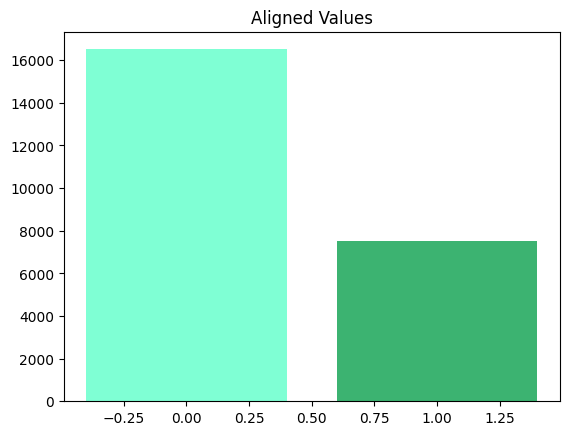

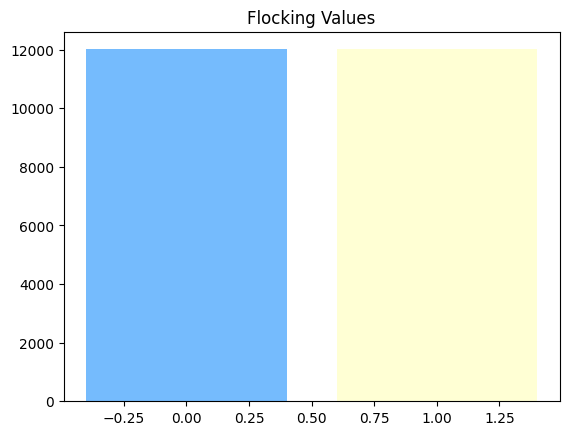

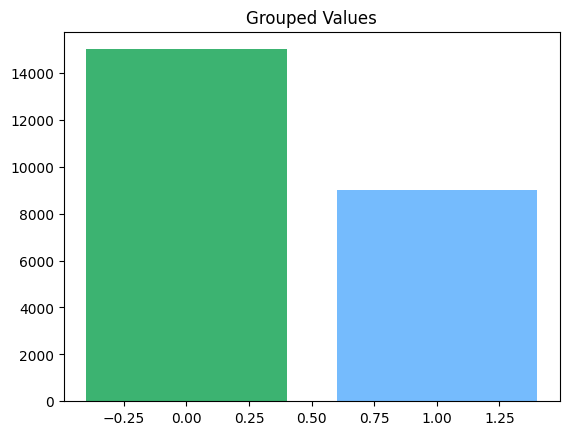

In [13]:
aligned_counts = df_Aligned['Class'].value_counts()
flocking_counts = df_Flocking['Class'].value_counts()
grouped_counts = df_Grouped['Class'].value_counts()

plt.bar(aligned_counts.index, aligned_counts.values, color=['aquamarine','mediumseagreen'])
plt.title("Aligned Values")
plt.show()

plt.bar(flocking_counts.index, flocking_counts.values, color=['xkcd:sky blue', 'xkcd:eggshell'])
plt.title("Flocking Values")
plt.show()

plt.bar(grouped_counts.index, grouped_counts.values, color=['mediumseagreen', 'xkcd:sky blue'])
plt.title("Grouped Values")
plt.show()

Para 'Aligned' e 'Grouped', os datasets estão desbalanceados, o primeiro um pouco mais que o segundo.

Curiosamente, para Flocking o dataset está perfeitamente balanceado

In [14]:
print(aligned_counts)
print(flocking_counts)
print(grouped_counts)

0    16511
1     7505
Name: Class, dtype: int64
0    12008
1    12008
Name: Class, dtype: int64
0    15010
1     9006
Name: Class, dtype: int64


### Dividindo o dataset em Train e Test

Primeiramente, para essa etapa do projeto, vou optar por tratar apenas de um dataset: o de 'Aligned'. O processo de preparação de dados é práticamente identico para todos eles ('Flocking' porém não precisará de balanceamento), e poderá ser facilmente replicado depois

A separação do dataset é feita logo no começo pois não queremos aplicar as técnicas de sampling no subset de teste. Isso poderia resultar em um bias indesejado no dataset, e estimativas de performance muito otimistas

In [85]:
from sklearn.model_selection import train_test_split

y = df_Aligned["Class"]
X = df_Aligned.drop("Class", axis=1)

A porcentagem de split para teste não tem um valor exato, mas geralmente é 20 ou 30%. Neste caso, considerando a quantidade de entradas e que o dataset de treino diminuirá de tamanho devido ao undersampling, optei por usar 20%

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train_resampled: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (19212, 2400)
Shape of X_test: (4804, 2400)
Shape of y_train_resampled: (19212,)
Shape of y_test: (4804,)


### Undersampling e Oversampling

O balanceamento será corrigido por meio de Undersampling seguido por Oversampling por SMOTE, com a intenção de resultar em um balanceamento de 50:50

Aqui optei por considerar o parâmetro de sampling_strategy no Undersampling como 0.7. Esse valor escolhi por me parecer adequado, mas posso modificá-lo no futuro se resultar em uma performance melhor nos modelos

In [88]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

samplingNum = 0.7

rus = RandomUnderSampler(sampling_strategy= samplingNum, random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Print the number of samples in each class after undersampling
print("Number of samples in each class after undersampling:")
print(y_train_resampled.value_counts())

# Apply oversampling to the resampled training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_resampled, y_train_resampled)

# Print the number of samples in each class after oversampling
print("Number of samples in each class after oversampling:")
print(y_train_resampled.value_counts())

Number of samples in each class after undersampling:
0    8615
1    6031
Name: Class, dtype: int64
Number of samples in each class after oversampling:
0    8615
1    8615
Name: Class, dtype: int64


### PCA

Por fim, aplicarei PCA, Principal Component Analysis, a fim de reduzir o número de features do dataset

In [89]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train_resampled)

Os dados são normalizados, e em seguida eu aplico PCA em um range de n_componentes, a fim de determinar o número de features mais adequado para o problema em questão. Optei por ir em intervalos de 100 até chegar em 1500 devido ao longo tempo de execução da célula seguinte

In [90]:
# Initialize PCA with a range of n_components
n_components_range = range(100, 1501, 100)  # range of 100, 200, 300, ..., 1500
explained_variances = []
for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    pca.fit(scaled_data)
    explained_variances.append(sum(pca.explained_variance_ratio_))
    print("Components:" ,n_components)

Components: 100
Components: 200
Components: 300
Components: 400
Components: 500
Components: 600
Components: 700
Components: 800
Components: 900
Components: 1000
Components: 1100
Components: 1200
Components: 1300
Components: 1400
Components: 1500


Aqui faço um gráfico da Variância Explicada x Número de Componentes Principais

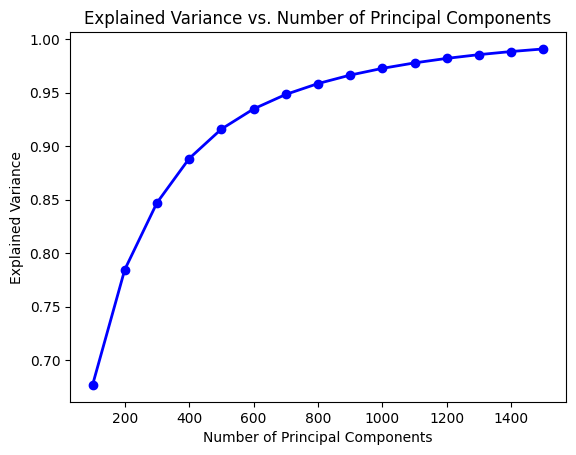

In [91]:
# Plot the explained variances
plt.plot(n_components_range, explained_variances, 'bo-', linewidth=2)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.show()

De acordo com um artigo no que li no medium, a fim de evitar Overfitting, nosso explained variance ratio deve chegar a cerca de 0.8, ou 80%. Nesse caso, portanto, opto por usar 300 componentes, reduzindo o dataset original para 12,5% (dimensionalmente falando) de seu total, e retendo 85% da variância. Posso depois optar por alterar o número de componentes, se resultar em uma melhora em performance nos modelos

In [92]:
pca=PCA(n_components=300)
pca.fit(scaled_data)

PCA(n_components=300)

In [93]:
np.sum(pca.explained_variance_ratio_)

0.847151158598568

Com os componentes escolhidos, aplico PCA nos dataframes de treino e teste

In [94]:
X_train_pca = pca.transform(X_train_resampled)

X_test_pca = pca.transform(X_test)

print(f"Shape of X_train_pca: {X_train_pca.shape}")
print(f"Shape of X_test_pca: {X_test_pca.shape}")

print(f"Shape of y_train_resampled: {y_train_resampled.shape}")
print(f"Shape of y_test: {y_test.shape}")

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Shape of X_train_pca: (17230, 300)
Shape of X_test_pca: (4804, 300)
Shape of y_train_resampled: (17230,)
Shape of y_test: (4804,)


Por fim normalizo os subsets de treino e teste por meio do scaler, e, a fim de facilitar a minha vida depois, volto a utilizar os seus nomes padrão.

In [95]:
X_train = scaler.fit_transform(X_train_pca)
X_test = scaler.fit_transform(X_test_pca)
y_train = y_train_resampled